<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_cuk_edu/_005_3_computer_vision/07_cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**노트북 파일명** 07-cnn2

# Dropout

런타임 유형: GPU 확인

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Jun 22 22:27:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Dropout없이 CIFAR-10 학습

In [3]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplain', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
NUM_CLASSES = 10

from keras.utils.np_utils import to_categorical

if y_test.shape[1] == 1:
    x_train = x_train/255.
    x_test = x_test/255.
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 21s 6ms/step - loss: 1.4767 - accuracy: 0.4603 - val_loss: 1.1052 - val_accuracy: 0.6055
Epoch 2/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9629 - accuracy: 0.6590 - val_loss: 0.9044 - val_accuracy: 0.6868
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7633 - accuracy: 0.7324 - val_loss: 0.8096 - val_accuracy: 0.7202
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6438 - accuracy: 0.7759 - val_loss: 0.7989 - val_accuracy: 0.7285
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5542 - accuracy: 0.8055 - val_loss: 0.7460 - val_accuracy: 0.7533
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4711 - accuracy: 0.8344 - val_loss: 0.7861 - val_accuracy: 0.7464
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3988 - accuracy: 0.8594 - val_loss: 0.8543 - val_accurac

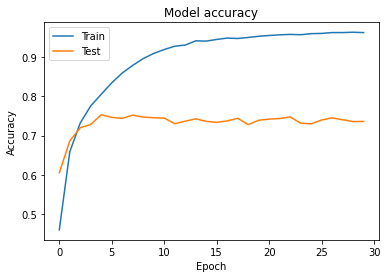

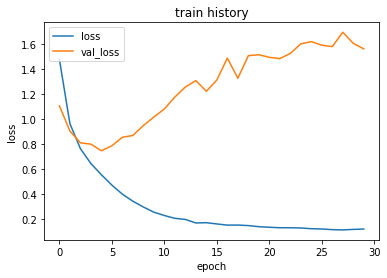

In [5]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

Fully connected 레이어에 dropout 0.5 적용

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7821 - accuracy: 0.3386 - val_loss: 1.2974 - val_accuracy: 0.5296
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3186 - accuracy: 0.5256 - val_loss: 1.1012 - val_accuracy: 0.6081
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1485 - accuracy: 0.5960 - val_loss: 1.0022 - val_accuracy: 0.6477
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0315 - accuracy: 0.6387 - val_loss: 0.9081 - val_accuracy: 0.6790
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9560 - accuracy: 0.6687 - val_loss: 0.8550 - val_accuracy: 0.7059
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8972 - accuracy: 0.6885 - val_loss: 0.8703 - val_accuracy: 0.6965
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8398 - accuracy: 0.7105 - val_loss: 0.7747 - val_accur

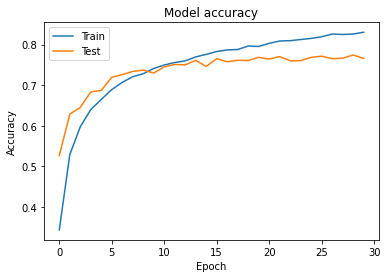

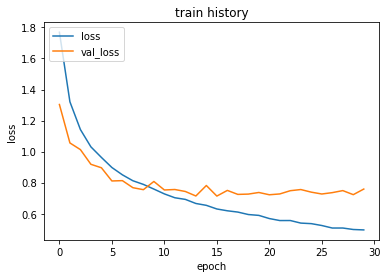

In [ ]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('train history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# VGG-16

In [8]:
image_path = keras.utils.get_file("dog.jpg", "https://github.com/kotech1/computervision/blob/master/img/dog.jpg?raw=true")

172032/163759 [===============================] - 0s 0us/step


In [9]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet', include_top=True)


img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02110063', 'malamute', 0.3237253), ('n02110185', 'Siberian_husky', 0.21747138), ('n02109961', 'Eskimo_dog', 0.15270977)]


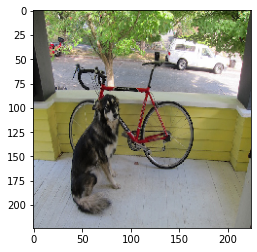

In [10]:
plt.imshow(img)

In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## imagenette


subset of imageNet  
https://github.com/fastai/imagenette  

In [12]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz


--2022-06-22 23:02:40--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.39.118
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.39.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341663724 (326M) [application/x-tar]
Saving to: ‘imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.83M  54.1MB/s    in 6.6s    

2022-06-22 23:02:47 (49.3 MB/s) - ‘imagenette2-320.tgz’ saved [341663724/341663724]



In [13]:
!ls 

imagenette2-320.tgz  sample_data


In [14]:
!tar xvzf imagenette2-320.tgz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
imagenette2-320/train/n03888257/n03888257_16077.JPEG
imagenette2-320/train/n03888257/n03888257_23339.JPEG
imagenette2-320/train/n03888257/n03888257_44204.JPEG
imagenette2-320/train/n03888257/n03888257_61633.JPEG
imagenette2-320/train/n03888257/n03888257_15067.JPEG
imagenette2-320/train/n03888257/n03888257_75365.JPEG
imagenette2-320/train/n03888257/n03888257_63966.JPEG
imagenette2-320/train/n03888257/n03888257_3927.JPEG
imagenette2-320/train/n03888257/n03888257_20684.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-320/train/n03888257/n03888257_14016.JPEG
imagenette2-320/train/n03888257/n03888257_37776.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-320/train/n03888257/n03888257_17513.JPEG
imagenette2-320/train/n03888257/n03888257_17143.JPEG
imagenette2-320/train/n03888257/n03888257_6738.JPEG
imagenette2-320/train/n03888257/n03888257_4355.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_000

In [15]:
json_path = keras.utils.get_file("imagenet_class_index.json", "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json")

import json
# Opening JSON file 
with open(json_path) as json_file: 
    imagenet_class_index = json.load(json_file) 

49152/35363 [=========================================] - 0s 0us/step


In [16]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow import keras
import numpy as np

SAVE_DIR = '.'
model = VGG16(weights=None, classes=10)
try:
  model.load_weights(SAVE_DIR+'/best_model.h5')
  print('load done')
except:
  pass
#print(model.summary())
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# create a data generator
datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

DATA_DIR = 'imagenette2-320'

# load and iterate training dataset
train_it = datagen.flow_from_directory(DATA_DIR+'/train/', target_size=(224, 224), class_mode='categorical', batch_size=64)
# load and iterate validation dataset
val_it = datagen.flow_from_directory(DATA_DIR+'/val/', target_size=(224, 224), class_mode='categorical', batch_size=64)
# load and iterate test dataset
#test_it = datagen.flow_from_directory(DATA_DIR+'/test/', class_mode='binary', batch_size=64)

checkpoint = ModelCheckpoint(SAVE_DIR+"/best_model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

from tensorflow.keras.callbacks import Callback

class LrReducer(Callback):
    def __init__(self, patience=0, reduce_rate=0.5, reduce_nb=10, verbose=1):
        super(Callback, self).__init__()
        self.patience = patience
        self.wait = 0
        self.best_score = -1.
        self.reduce_rate = reduce_rate
        self.current_reduce_nb = 0
        self.reduce_nb = reduce_nb
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        #current_score = logs.get('val_accuracy')
        current_score = logs.get('accuracy')
        if current_score > self.best_score:
            self.best_score = current_score
            self.wait = 0
            if self.verbose > 0:
                print('---current best score: %.3f' % current_score)
        else:
            if self.wait >= self.patience:
                self.current_reduce_nb += 1
                if self.current_reduce_nb <= 10:
                    lr = keras.backend.get_value(self.model.optimizer.lr)
                    keras.backend.set_value(self.model.optimizer.lr, lr*self.reduce_rate)
                    if self.verbose > 0:
                        print('---lr decreasing: %e' % (lr*self.reduce_rate))
                else:
                    if self.verbose > 0:
                        print("Epoch %d: early stopping" % (epoch))
                    self.model.stop_training = True
            self.wait += 1
lrreducer = LrReducer(patience=5)
# fit model
history = model.fit(train_it, steps_per_epoch=16, validation_data=val_it, 
          validation_steps=8, 
          epochs=100, callbacks=[checkpoint,lrreducer])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 11.0708 - accuracy: 0.1270
Epoch 1: loss improved from inf to 11.07082, saving model to ./best_model.h5
---current best score: 0.127
16/16 [==============================] - 37s 2s/step - loss: 11.0708 - accuracy: 0.1270 - val_loss: 2.3098 - val_accuracy: 0.1113
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.3095 - accuracy: 0.0979
Epoch 2: loss improved from 11.07082 to 2.30945, saving model to ./best_model.h5
16/16 [==============================] - 36s 2s/step - loss: 2.3095 - accuracy: 0.0979 - val_loss: 2.3004 - val_accuracy: 0.0840
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 2.2989 - accuracy: 0.1191
Epoch 3: loss improved from 2.30945 to 2.29887, saving model to ./best_model.h5
16/16 [==============================] - 24s 2s/step - loss: 2.2989 - accuracy: 0.1191 - val_loss: 2.2

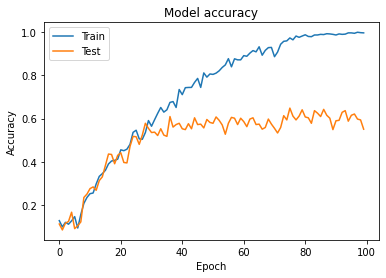

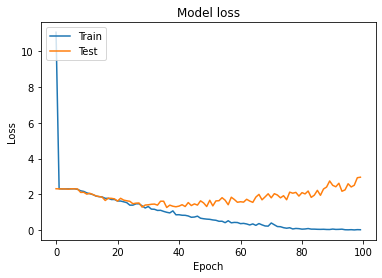

In [17]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

imagenette 클래스 명 정의

In [18]:
class_indices = list(train_it.class_indices.keys())
class_values = list(val_it.class_indices.values())
class_names=[]
for i in range(1000):
  if imagenet_class_index['{}'.format(i)][0] in class_indices:
    class_names.append(imagenet_class_index['{}'.format(i)][1])

In [19]:
train_it.class_indices

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [20]:
model2 = keras.models.load_model(SAVE_DIR+"/best_model.h5")
model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

'French_horn'

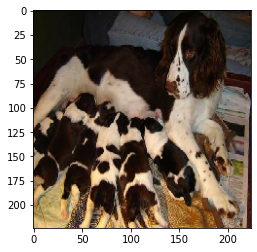

In [21]:
#image_path2 = 'imagenette2-320/val/n02102040/n02102040_7501.JPEG'
#image_path2 = 'imagenette2-320/val/n03028079/ILSVRC2012_val_00019711.JPEG'
image_path2 = 'imagenette2-320/val/n02102040/n02102040_6180.JPEG'
img = image.load_img(image_path2, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model2.predict(x)

plt.imshow(img)
class_names[preds[0].argmax()]

In [43]:
train_it[0][0][:1].reshape(224, 224, 3)

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


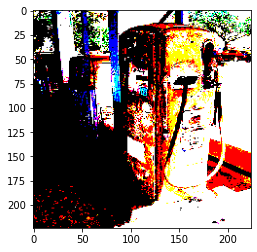

In [22]:
img = train_it[0][0][0]
plt.imshow(img)

여러가지 기본 고성능 모델  

https://keras.io/api/applications/  

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import ResNet152V2

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1

In [16]:
from tensorflow import keras
import numpy as np

image_path = keras.utils.get_file("dog.jpg", "https://github.com/kotech1/computervision/blob/master/img/dog.jpg?raw=true")

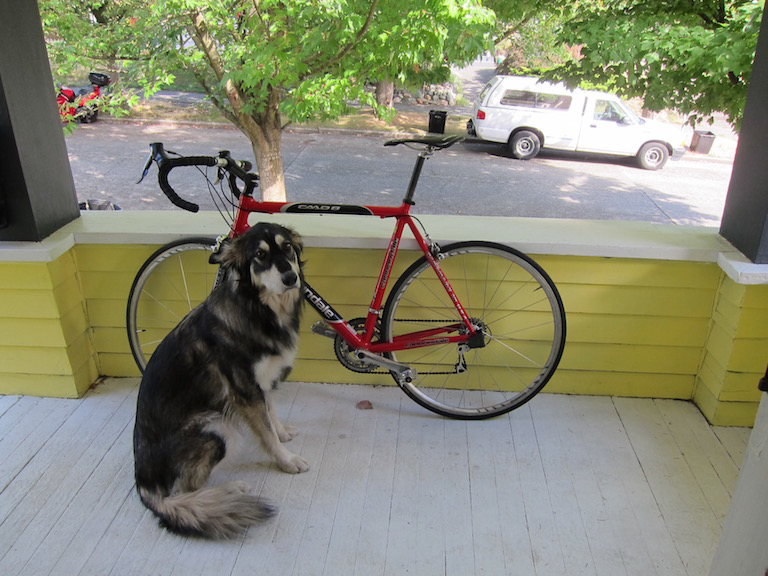

In [3]:
img = keras.preprocessing.image.load_img(image_path)
img

In [10]:
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr.shape

(576, 768, 3)

In [13]:
img_r, img_g, img_b = img_arr[:,:, 0], img_arr[:,:, 1], img_arr[:,:, 2]

In [14]:
img_y = 0.299 * img_r + 0.587 * img_g + 0.114 * img_b
img_cb = -0.16874 * img_r - 0.33126 * img_g + 0.5 * img_b
img_cr = 0.5 * img_r - 0.41869 * img_g - 0.08131 * img_b 

In [28]:
img_y.shape, img_cb.shape, img_cr.shape

((576, 768), (576, 768), (576, 768))

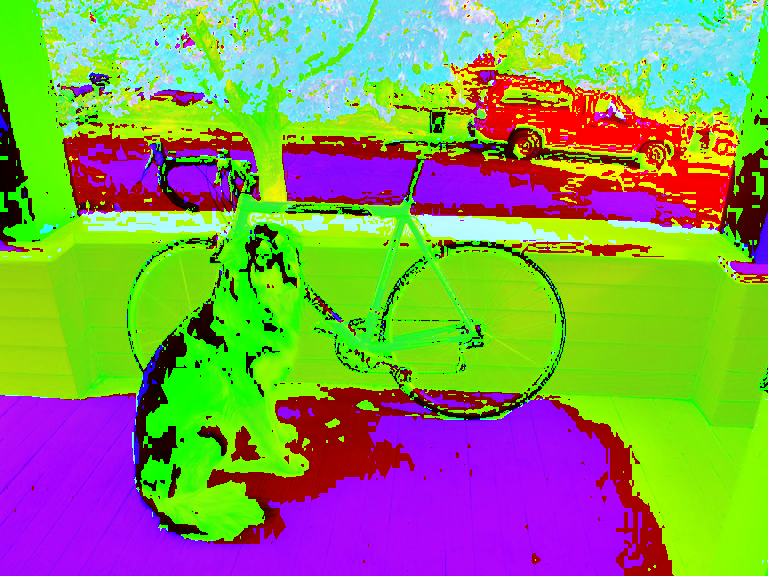

In [36]:
ycbr_arr = np.dstack((img_y, img_cb, img_cr)).astype(np.uint8)
ycbr_arr.shape
result = keras.preprocessing.image.array_to_img(ycbr_arr)
result

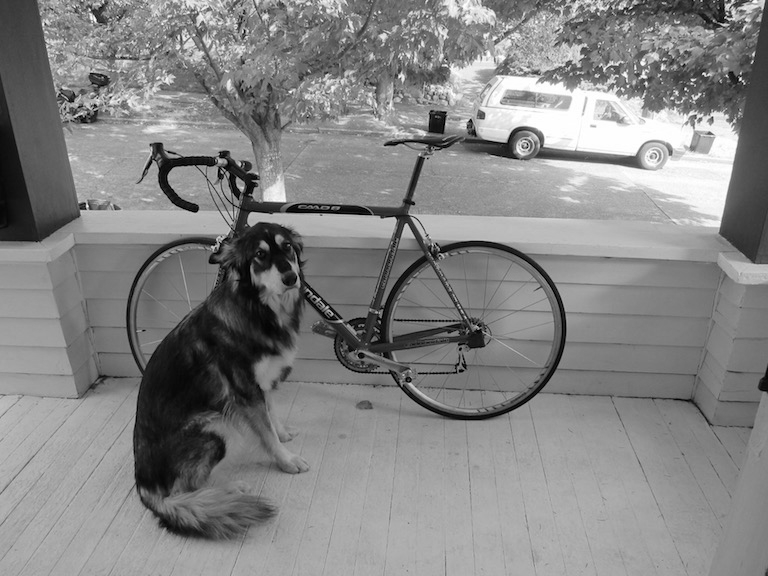

In [39]:
keras.preprocessing.image.array_to_img(np.expand_dims(img_y, axis=-1))

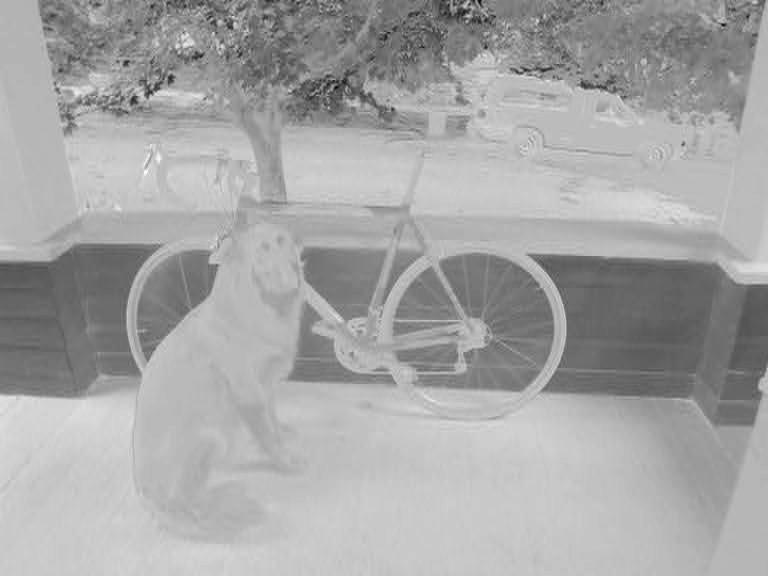

In [40]:
keras.preprocessing.image.array_to_img(np.expand_dims(img_cb, axis=-1))

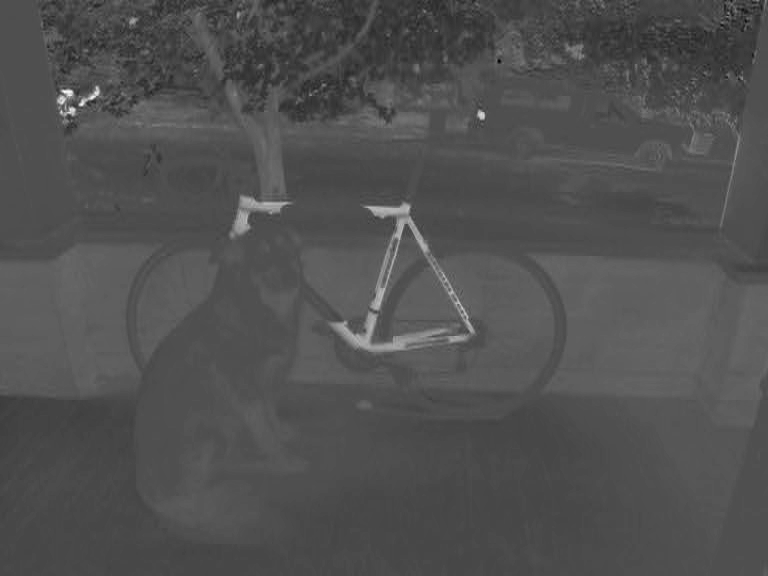

In [41]:
keras.preprocessing.image.array_to_img(np.expand_dims(img_cr, axis=-1))

(576, 768, 3)


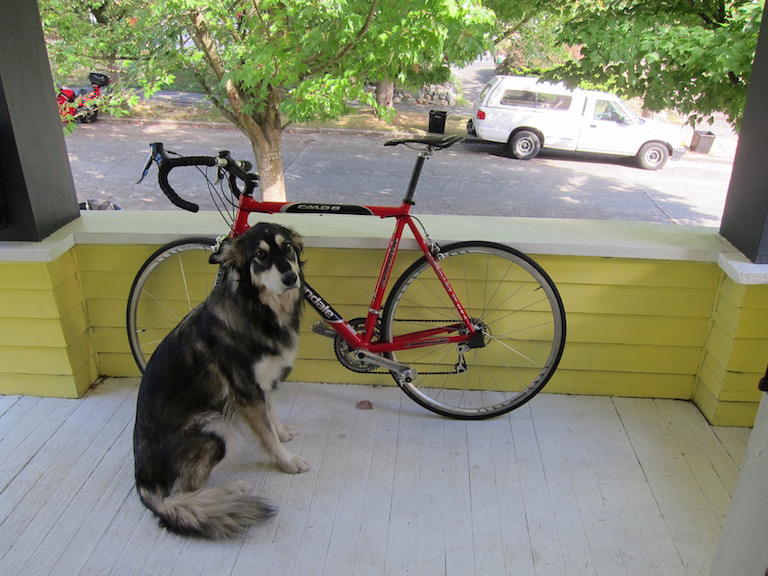

In [42]:
r = img_y + 1.4202 * img_cr
g = img_y - 0.34414 * img_cb - 0.71414 * img_cr
b = img_y + 1.772 * img_cb

rgb_arr = np.dstack((r, g, b)).astype(np.uint8)
print(rgb_arr.shape)

result = keras.preprocessing.image.array_to_img(rgb_arr)
result

In [43]:
img_arr == result

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True, False],
        [ True,  True, False],
        [False,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True, False],
        [ True,  True, False],
        [False,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True, False],
        [ True,  True, False],
        [False,  True,  True]],

       ...,

       [[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [ True,  True, False],
        [ True,  True, False],
        [ True,  True, False]],

       [[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        ...,
        [ True,  True, False],
        [ True,  True, False],
        [ True,

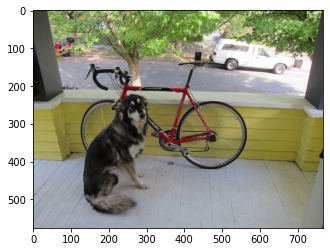

In [55]:
import matplotlib.pyplot as plt
plt.imshow(img_arr / 255.)

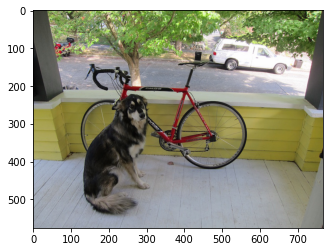

In [56]:
plt.imshow(keras.preprocessing.image.img_to_array(result) / 255.)